In [1]:
"""
Natural Language Processing Semester Project.
Product Aspect Sentiment Analysis.
Data from Kaggle

Steps :
1- Data is cleaned first.
2- Contextually similar reviews are seperated into seperate lists main themes are : Price, Comfort, Location.
3- Sentiment Analysis techniques <using sentiwordnet> are used to extract sentiments from the seperated reviews.
4- The sentiments are visualized using pylog.


Author: Bilal Rahim
Date:20th May, 2020

"""

'\nNatural Language Processing Semester Project.\nProduct Aspect Sentiment Analysis.\nData from Kaggle\n\nSteps :\n1- Data is cleaned first.\n2- Contextually similar reviews are seperated into seperate lists main themes are : Price, Comfort, Location.\n3- Sentiment Analysis techniques <using sentiwordnet> are used to extract sentiments from the seperated reviews.\n4- The sentiments are analysed using pylog.\n\n\nAuthor: Bilal Rahim\nDate:20th May, 2020\n\n'

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.feature_extraction import stop_words
stopWordsList=list(stop_words.ENGLISH_STOP_WORDS)
from string import punctuation as punc
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()
import nltk
from nltk.corpus import wordnet
from nltk.corpus import sentiwordnet as swnet
import numpy as np
from matplotlib import rc

In [3]:
import sys
import os

In [4]:
path=os.path.join(sys.path[0],"hotel_rev.csv")

In [5]:
corpus = pd.read_csv(path)

In [6]:
reviews= corpus.iloc[:,[14]].values
x = reviews.flatten()
reviews = x.tolist()

In [7]:
counter = 0 
for rev in reviews:
    if type(rev) != str:
        reviews.remove(reviews[counter])
    counter +=1

rem
rem
rem
rem
rem
rem
rem
rem
rem
rem
rem
rem
rem
rem
rem
rem
rem
rem


In [8]:
tempList=[]
stemmingList=[]
finalList=[]
joinOn=" "
tempSplit=[]
counter = 0
for rev in reviews:
    if(type(rev)==str):
        tempList=rev.split(" ")    
        remStopWord=[word for word in tempList if word not in stopWordsList] #Removing stop words.
        remPunctuation=[word for word in remStopWord if word not in punc]
        for word in remPunctuation:
        
        
            stemmingList.append(wl.lemmatize(ps.stem(word),'v')) #Stemming and lemmetizing words.
    #Joining words back toghether of the review after preprocessing techniques to make it whole.
        joinStr=joinOn.join(stemmingList)
    #List that contains reviews after the preprocessing techniques as elements.
        finalList.append(joinStr)
        stemmingList=[]


In [9]:
#To Remove Punctuation.
fflist=[]
for rev in finalList:
    tempWord=""
    for char in rev:
        if char not in punc:
            tempWord=tempWord+char
    fflist.append(tempWord)      

In [10]:
#Main categories the reviews are divided into are:
#Price, Comfort and location.
#Seperating contextually similar reviews, using wordnet.


price = wordnet.synsets('price')[0]
comfort = wordnet.synsets('comfort')[0]
location = wordnet.synsets('location')[0]
temp_comf =0
temp_price= 0
temp_loc = 0

comfort_rev = []
price_rev=[]
location_rev=[]

for rev in fflist:
    tempWord = rev.split(' ')
    for word in tempWord:
        wordX = wordnet.synsets(word)
        if len(wordX) > 0 :
            wordX = wordnet.synsets(word)[0]
            
            price_score = wordnet.wup_similarity(price,wordX)
            if(price_score==None):
                price_score=0 
            
            comfort_score = wordnet.wup_similarity(comfort,wordX)
            if(comfort_score==None):
                comfort_score=0
            
            location_score = wordnet.wup_similarity(location,wordX)
            if(location_score==None):
                location_score=0
                
            
            max_score = max(price_score,comfort_score,location_score)
            if(max_score == price_score):
                temp_price += price_score
            if(max_score ==comfort_score):
                temp_comf+= comfort_score
            if(max_score == location_score):
                temp_loc +=location_score
    

    temp_max = max(temp_loc,temp_price,temp_comf)
    if(temp_max == 0):
        continue
    if(temp_max == temp_price):
       
        price_rev.append(rev)
    if(temp_max ==temp_comf):
        
        comfort_rev.append(rev)
    if(temp_max == temp_loc):
       
        location_rev.append(rev)
    temp_loc=0
    temp_price=0
    temp_comf=0

In [11]:
price_pos_rev = 0
price_neg_rev=0
comf_pos_rev=0
comf_neg_rev=0
loc_pos_rev=0
loc_neg_rev=0

In [12]:
#Sentiment Analysis (category = price).

good = wordnet.synsets('good')[0]
bad = wordnet.synsets('bad')[0]
tempneg = 0
temppos = 0 
for rev in price_rev:
    tempWord = rev.split(' ')
    for word in tempWord:
        wordX = wordnet.synsets(word)
        if len(wordX) > 0 :
            wordX = wordnet.synsets(word)[0]
            senti = swnet.senti_synset(wordX.name())
            pos_score = senti.pos_score()
            neg_score = senti.neg_score()
            if(pos_score > neg_score):
                temppos+=pos_score
            else:
                tempneg+=neg_score
    if (temppos > tempneg):
        price_pos_rev+=1
    else:
        price_neg_rev+=1
    tempneg = 0
    temppos = 0

In [13]:
#Sentiment Analysis (category = comfort).

good = wordnet.synsets('good')[0]
bad = wordnet.synsets('bad')[0]
tempneg = 0
temppos = 0 
for rev in comfort_rev:
    tempWord = rev.split(' ')
    for word in tempWord:
        wordX = wordnet.synsets(word)
        if len(wordX) > 0 :
            wordX = wordnet.synsets(word)[0]
            senti = swnet.senti_synset(wordX.name())
            pos_score = senti.pos_score()
            neg_score = senti.neg_score()
            if(pos_score > neg_score):
                temppos+=pos_score
            else:
                tempneg+=neg_score
    if (temppos > tempneg):
        comf_pos_rev+=1
    else:
        comf_neg_rev+=1
    tempneg = 0
    temppos = 0

In [14]:
#Sentiment Analysis (category = location).

good = wordnet.synsets('good')[0]
bad = wordnet.synsets('bad')[0]
tempneg = 0
temppos = 0 

for rev in location_rev:
    tempWord = rev.split(' ')
    for word in tempWord:
        wordX = wordnet.synsets(word)
        if len(wordX) > 0 :
            wordX = wordnet.synsets(word)[0]
            senti = swnet.senti_synset(wordX.name())
            pos_score = senti.pos_score()
            neg_score = senti.neg_score()
            if(pos_score > neg_score):
                temppos+=pos_score
            else:
                tempneg+=neg_score
    if (temppos > tempneg):
        loc_pos_rev+=1
    else:
        loc_neg_rev+=1
    tempneg = 0
    temppos = 0

In [15]:
senti_dict = {"Price":[(price_pos_rev/len(price_rev))*100,(price_neg_rev/len(price_rev))*100],"Comfort":[(comf_pos_rev/len(comfort_rev))*100,(comf_neg_rev/len(comfort_rev))*100],"Location":[(loc_pos_rev/len(location_rev))*100,(loc_neg_rev/len(location_rev))*100]}

In [16]:
pip install pygal

Note: you may need to restart the kernel to use updated packages.


In [17]:
#Graphing The Results..

In [18]:
import pygal
from IPython.display import SVG, display

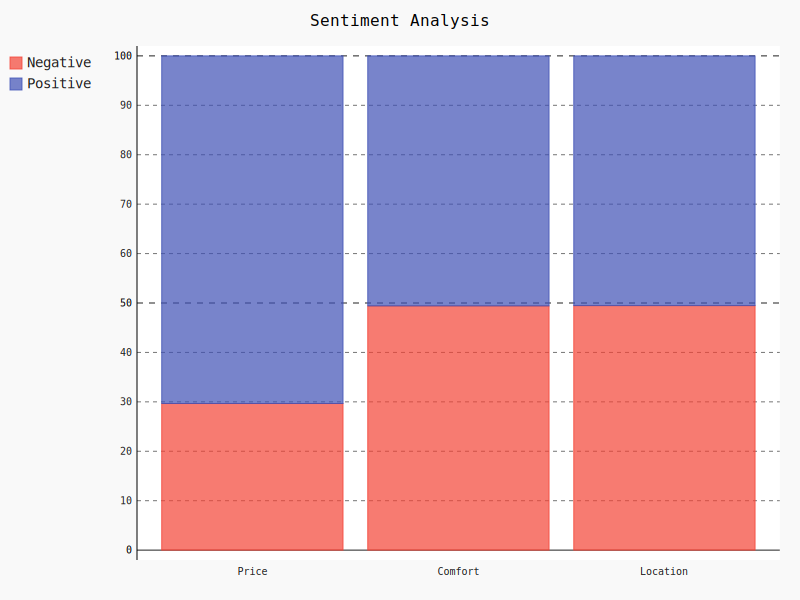

In [19]:
line_chart = pygal.StackedBar()
line_chart.title = 'Category Wise Sentiment'
line_chart.x_labels = ["Price","Comfort","Location"]
line_chart.add('Negative',  [senti_dict["Price"][1],senti_dict["Comfort"][1],senti_dict["Location"][1]])
line_chart.add('Positive', [senti_dict["Price"][0],senti_dict["Comfort"][0],senti_dict["Location"][0]])
display(SVG(line_chart.render(disable_xml_declaration=True)))